# Inicio del TP

## Introducción

  Como primer medida como a lo largo del TP se va a necesitar generar datos en forma de diagonales, paralelas y espirales vamos a definir estas al inicio e ir usándolas a medida que se vaya necesitando.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import time
from sklearn import metrics
import matplotlib.ticker as mticker
from IPython.display import display


In [22]:
# Diagonales

def diagonales(n, d, C):
  mean0 = np.full(d,-1)
  mean1 = np.full(d,1)
    
  desviacion_std = C * np.sqrt(d)
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df


# Paralelas

def paralelas(n, d, C):
  mean0 = np.zeros(d)
  mean1 = np.zeros(d)
  mean0[0] = 1
  mean1[0] = -1

  desviacion_std = C
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df


# Espirales

def toCartesianP(r, theta):
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  return (x, y)

def toCartesianA(rs, thetas):
  a = [(r * np.cos(theta), r * np.sin(theta)) for r, theta in zip(rs, thetas)]
  return a

def espirales(n):
  r0s = np.sqrt(np.random.uniform(0, 1, n//2))  
  a0s = np.random.uniform(0, 1, n//2)
  theta0s = [np.pi*(4*r-a) for r,a in zip(r0s,a0s)]

  r1s = np.sqrt(np.random.uniform(0, 1, n//2))
  a1s = np.random.uniform(-1, 0, n//2)
  theta1s = [np.pi*(4*r-a) for r,a in zip(r1s,a1s)]

  input0 = toCartesianA(r0s,theta0s)
  input1 = toCartesianA(r1s,theta1s)

  output0 = np.full(n//2, 0)
  output1 = np.full(n//2, 1)

  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0,output1]).tolist()
  })

  return df

En el TP vamos a clasificar los datos usando un arbol de decision con los siguientes parametros:


In [23]:
Tree = lambda: DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

**criterion**: Decide que estrategia usar para decidir en que parámetros hacer un split.
El valor "entropy" utiliza el criterio de entropía y ganancia de información visto en clase.

**min_impurity_decrease**: Este valor controla si un split se realizara o no. Se realizara un nodo
en un split si la reducción de la entropía después de este split es mayor a este valor. Un árbol
con un *min_impurity_decrease* bajo tendera a realizar mas splits que uno con un valor alto.

**random_state**: Este valor es la semilla para el generador de números aleatorios y determina como se
comportara el árbol cuando se sigue un procedimiento que dependa de la aleatoriedad(como por ejemplo mezclar
una lista). Un valor fijo de 0 indica que el árbol realizara el mismo procedimiento en multiples llamadas lo
que aumenta la reproducibilidad.

**min_samples_leaf**: Controla cuantos valores tiene que haber en cada hoja del árbol luego de un split. Un valor
de 5 indica que un nodo sera candidato a un split si y solo si luego de realizarlo hay al menos 5 nodos tanto a la
izquierda como a la derecha del split.

## Ejercicio 1

Generamos 3 conjuntos de entrenamiento para nuestro arbol, correspondientes al
problema de las espirales, de diferentes longitudes; 150, 600 y 3000. 

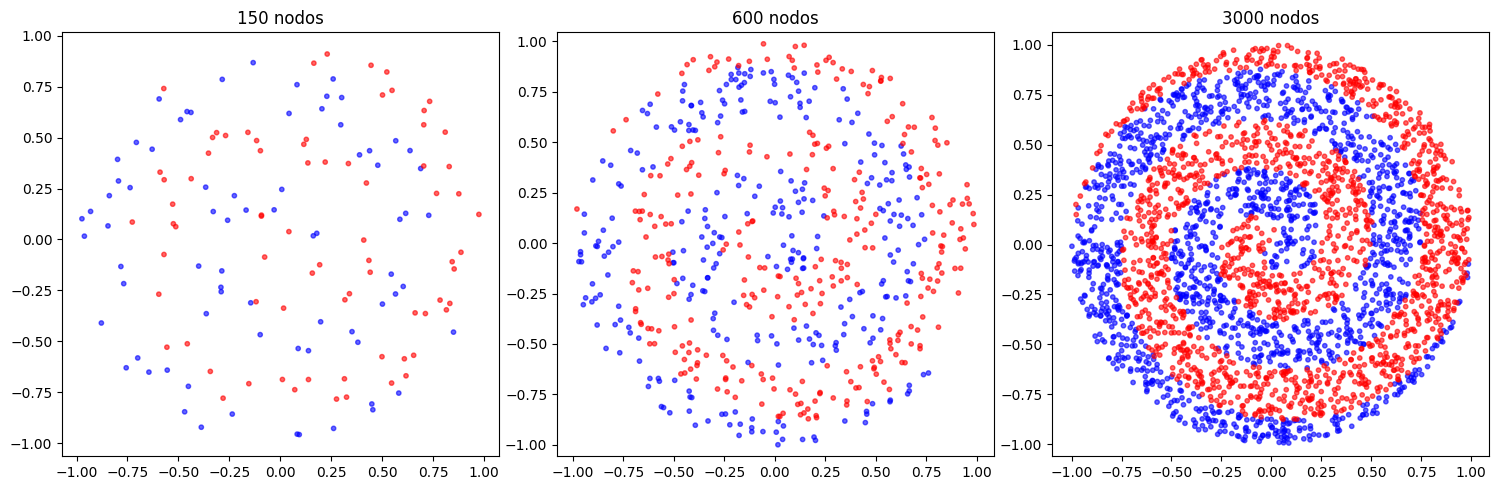

In [24]:
e1 = espirales(150)
e2 = espirales(600)
e3 = espirales(3000)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, data, title in zip(
    axs, [e1, e2, e3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

Y un conjunto de prueba usando 10000 puntos de las espirales:

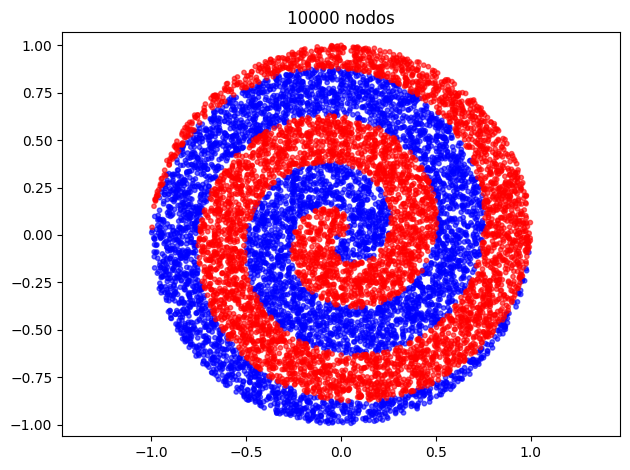

In [25]:
test = espirales(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Entrenamos los arboles de decision a partir de cada uno de los conjunto definidos previamente. Lo cual nos genera los siguientes arboles de ejemplo.

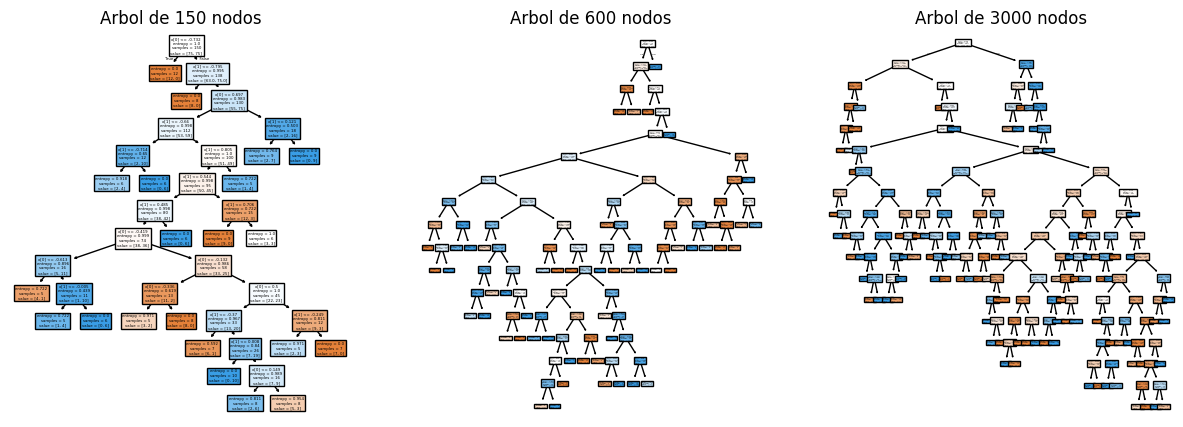

In [26]:
t1 = Tree()
t2 = Tree()
t3 = Tree()

t1.fit(e1['input'].tolist(), e1['output'].tolist())
t2.fit(e2['input'].tolist(), e2['output'].tolist())
t3.fit(e3['input'].tolist(), e3['output'].tolist())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['Arbol de 150 nodos', 'Arbol de 600 nodos', 'Arbol de 3000 nodos']):

    tree.plot_tree(t, filled=True, ax=ax)

    ax.set_title(title)
    

plt.show()

A medida que aumentan los puntos generados aumenta la cantidad de nodos del árbol. Esto se debe a dos razones, 
1. Nuestro árbol de decision tiene un *min_impurity_decrease* muy bajo (0.02) esto hace que tienda a hacer muchos splits. 
2. El valor de *min_sample_leaf* hace que el árbol eventualmente deje de hacer splits para mantener la cantidad de valores en las hojas alto, lo que efectivamente reduce la altura de los arboles y hace que termine antes cuando hay menos nodos.  

Podemos ver que tan bien predicen los arboles si probamos que tan bien predicen los datos del conjunto de test.

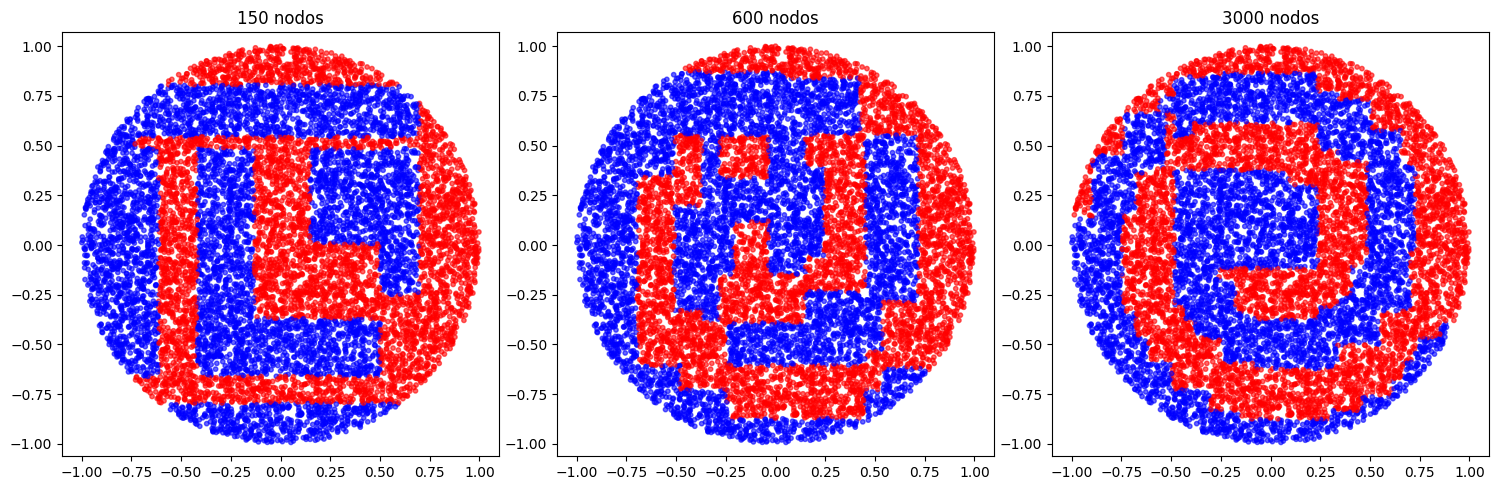

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

A medida que aumenta la cantidad de nodos que se usan para entrenamiento las predicciones sobre el conjunto de test son más precisas. Esto se debe a dos razones:

1. El árbol de decision que usamos hace splits siempre que puede debido a que tiene un *min_impurity_decrease* muy bajo(hace muchos splits) y un *min_sample_leaf* muy bajo(la altura del árbol de decision aumenta mucho). Por lo que el árbol hace una exploración exhaustiva del conjunto de entrenamiento.

2. A medida que agarramos mas nodos para entrenar obtenemos una muestra más significativa del conjunto de entrenamiento (porque los puntos se generan de manera uniforme). Asi que es más un probable que un árbol que predice muy bien sobre un conjunto grande prediga bien sobre el conjunto de test. 

----

## Ejercicio 2

Tenemos que generar 20 conjuntos de entrenamiento usando la siguiente cantidad de puntos; 125, 250, 500, 1000, 2000, 4000. Aqui hay una muestra de ejemplo para cada uno de los tamaños.

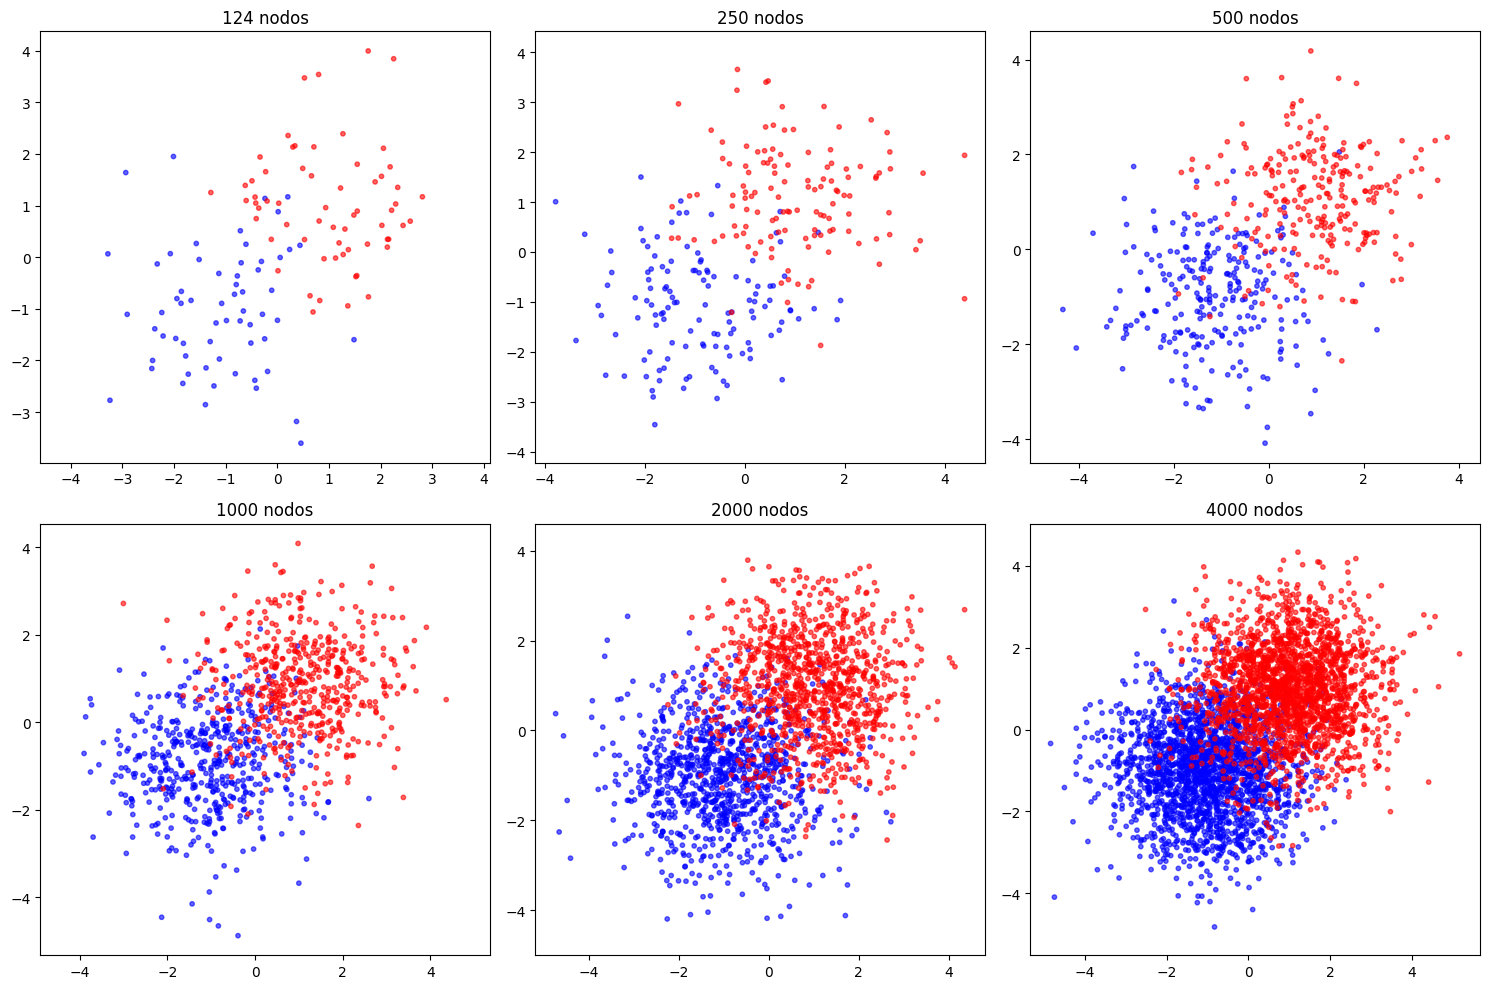

In [ ]:
sizes = [125, 250, 500, 1000, 2000, 4000]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

diag = lambda n: diagonales(n, 2, 0.78)

datas = [diag(sz) for sz in sizes]

axs = axs.reshape(-1)  

for ax, data in zip(axs, datas):
    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()


Tambien generamos un conjunto de prueba usando 10000 nodos.

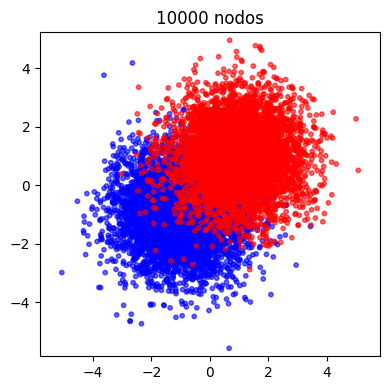

In [ ]:
plt.figure(figsize=(4, 4))

test = diag(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

En primer lugar generamos una grafica para ver como son las predicciones para cada punto para un arbol generado por las muestras de entrenamiento anteriores.

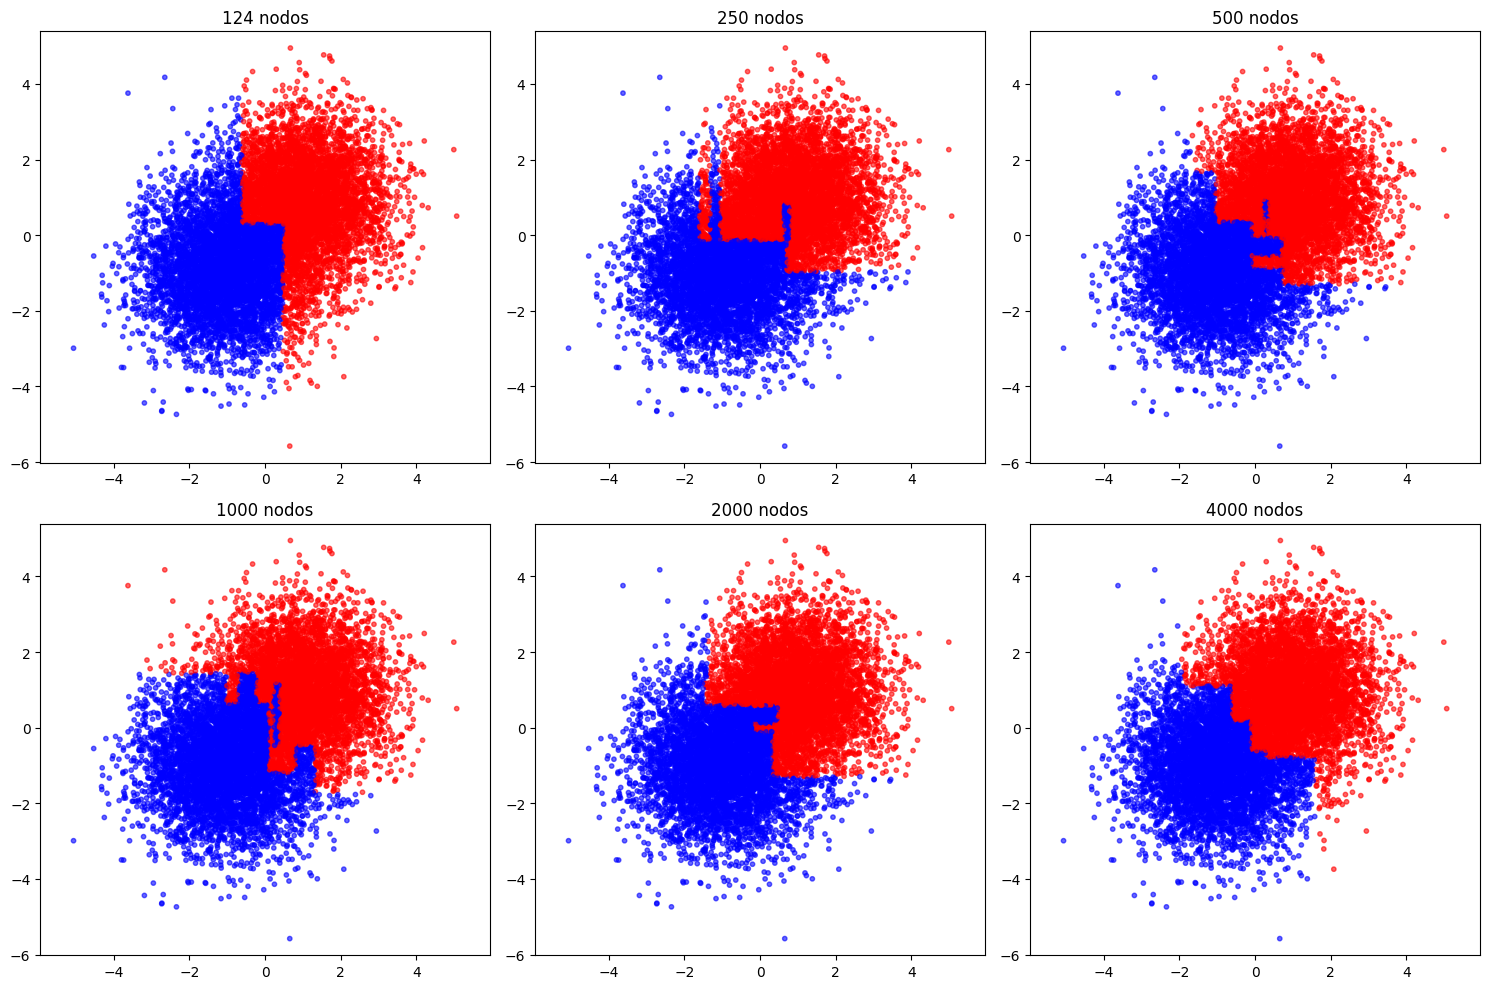

In [45]:
t = Tree()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

axs = axs.ravel() 

for ax, data in zip(axs, datas):

    # Entreno el árbol con los datos
    t.fit(data['input'].tolist(), data['output'].tolist())

    # Genero la gráfica
    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

A medida que se va aumentando la cantidad de nodos del árbol se puede ver que la frontera entre las dos areas se va modificando. Esta modificación consiste en pasar de una frontera casa "vertical" a una "escalonada" (puede se que se tienda a una frontera "diagonal" en vez de una "escalonada").

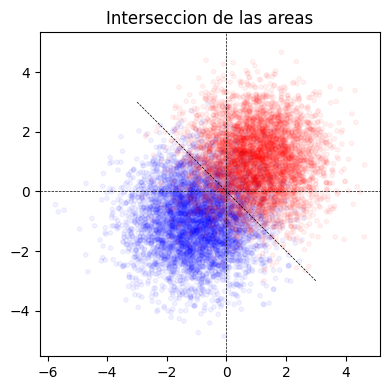

In [46]:
plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p,c in zip(test['input'], test['output'])]
y = [p[1] for p,c in zip(test['input'], test['output'])]

c = test['output']

plt.scatter(x, y,c=c, cmap='bwr', alpha=0.05, s=10)
plt.title("Interseccion de las areas")

# Setear los limite de los ejes en (-3,3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Poner el centro en (0,0)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

# marcar la recta y=-x
plt.plot([-3, 3], [3, -3], color='black', lw=0.5, ls='--')

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

¿Porque pasa esto?. En todo momento el árbol intenta minimizar la entropía, una menor entropía indica que los elementos del conjunto están menos mezclados y por lo tanto es más fácil clasificar a los elementos del mismo como de una sola clase.


La mejor forma de dividir los elementos de las diagonales (y por lo tanto conseguir una menor entropía) es por la linea de intersección de las normales. Por lo tanto un árbol que intenta minimizar este parámetro se aproximara cada vez mas a esta linea divisora.

Algo similar ocurre si repetimos el experimento con los datos de "paralelas".

Generamos 20 conjuntos de ejemplo y un conjunto de test(con los mismos tamaños que en diagonales).

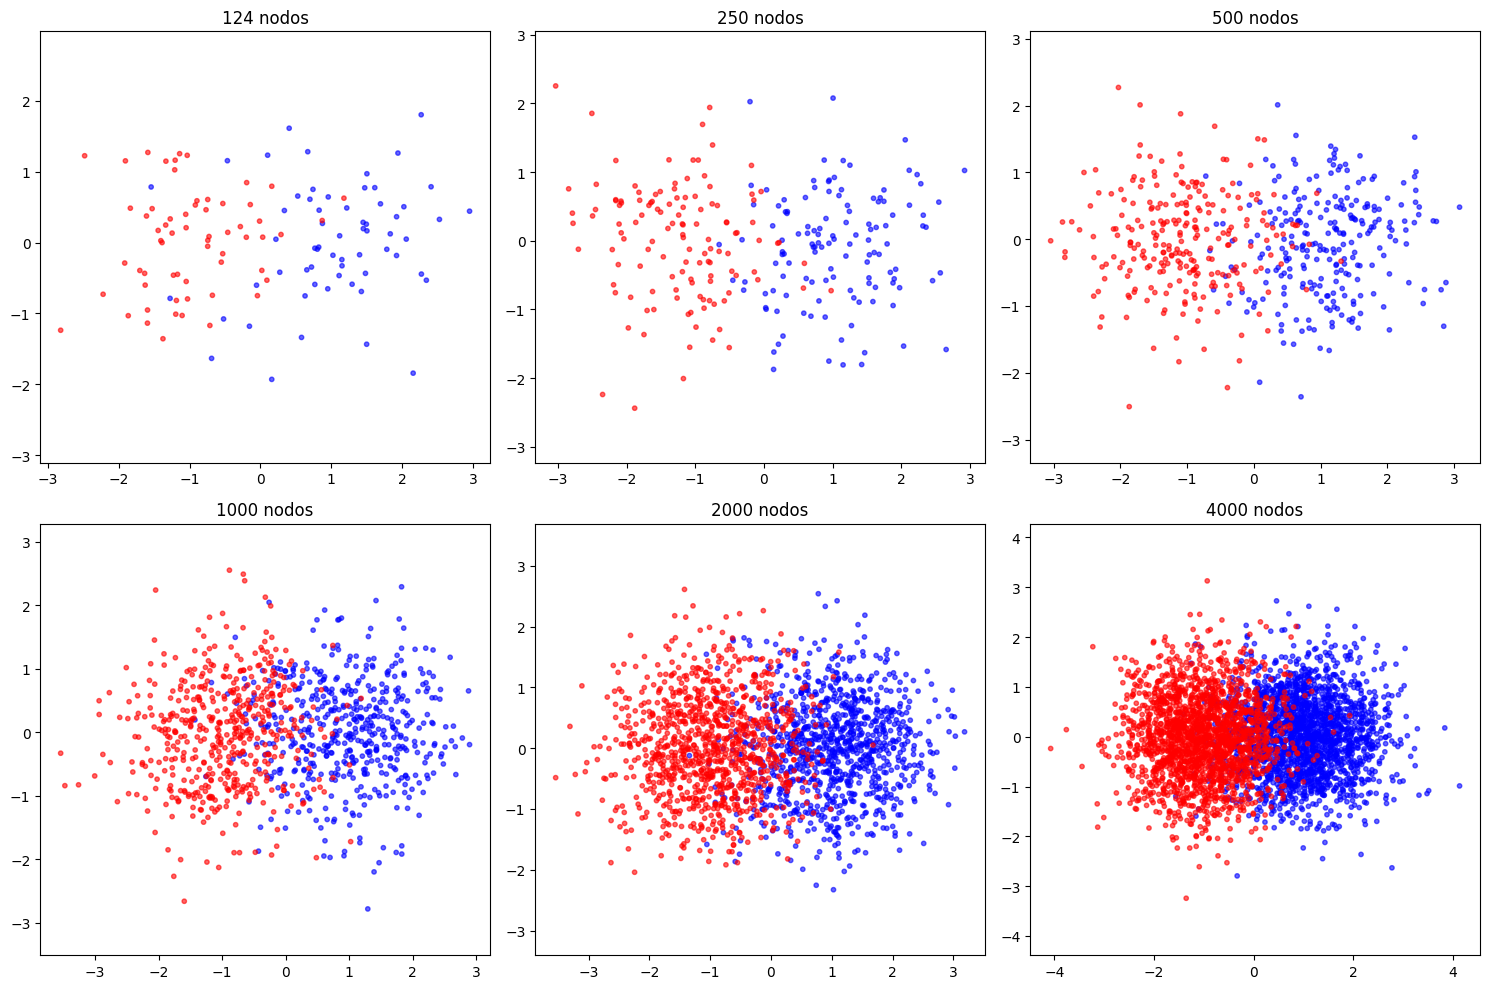

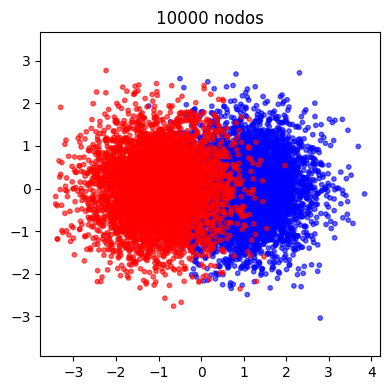

In [47]:
sizes = [125, 250, 500, 1000, 2000, 4000]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

diag = lambda n: paralelas(n, 2, 0.78)

datas = [diag(sz) for sz in sizes]

axs = axs.reshape(-1)  

for ax, data in zip(axs, datas):
    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()


# Conjunto de test

plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Ahora entrenamos un arbol con los conjuntos de ejemplo:

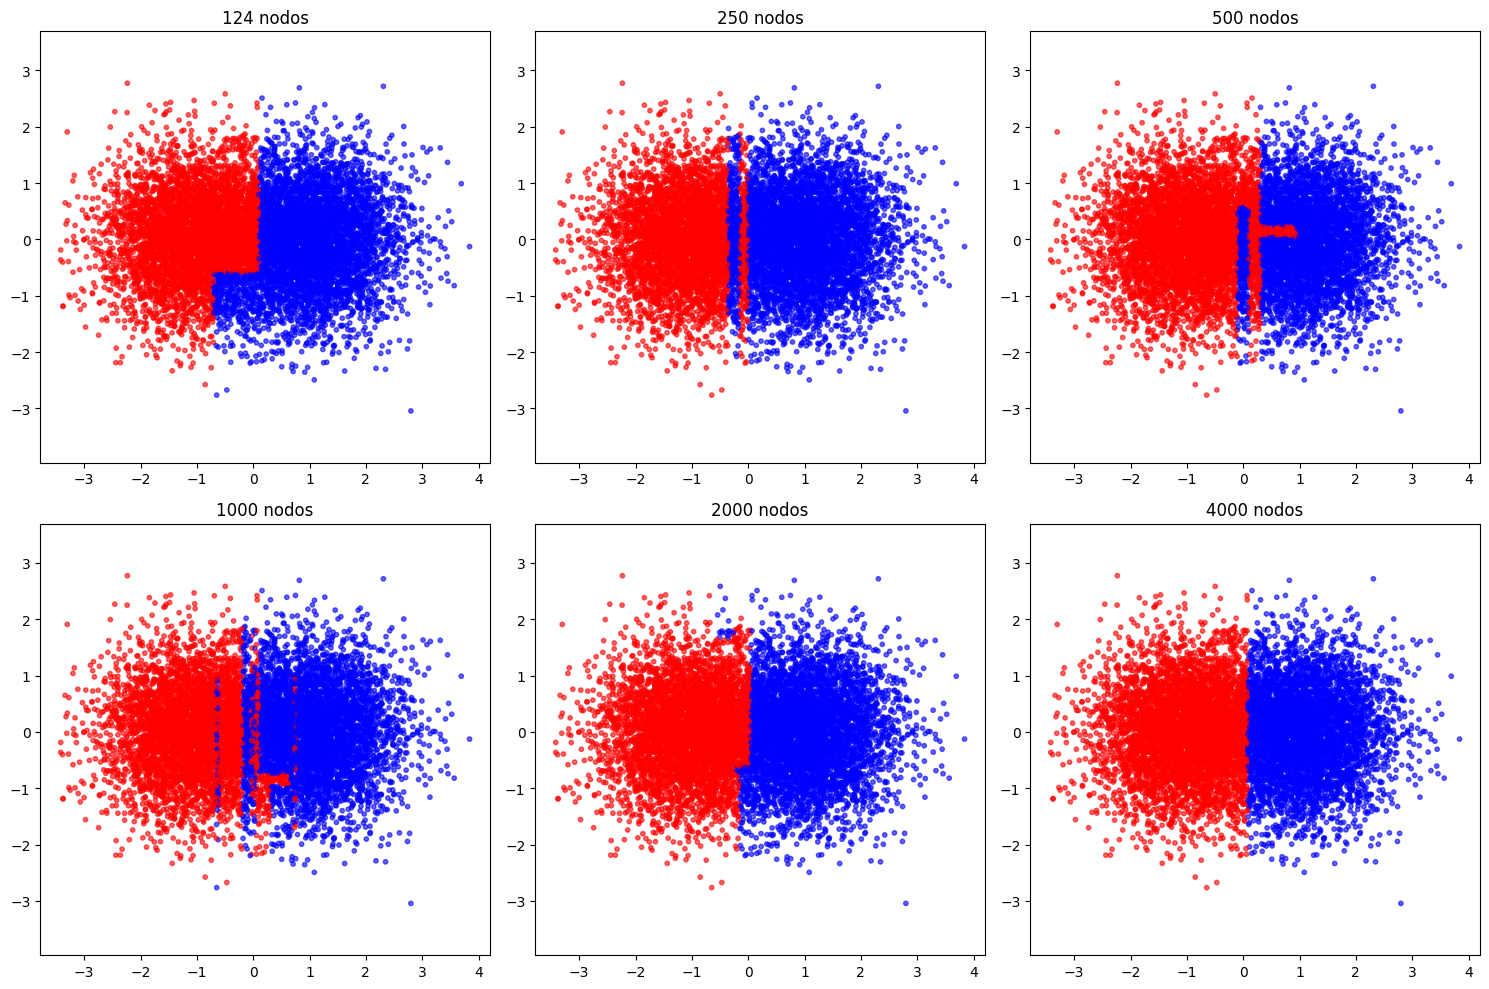

In [48]:
t = Tree()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

axs = axs.ravel() 

for ax, data in zip(axs, datas):

    # Entreno el árbol con los datos
    t.fit(data['input'].tolist(), data['output'].tolist())

    # Genero la gráfica
    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

En este caso la linea divisora que minimiza la entropía es la linea que vertical que pasa por el origen de coordenadas, esto lo podemos ver si graficamos los datos con menor transparencia.

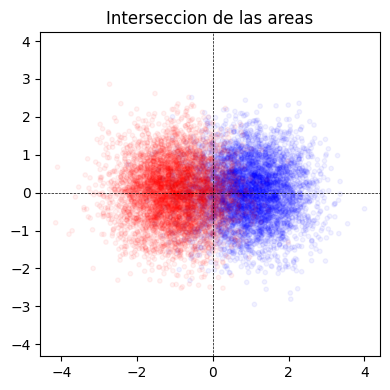

In [49]:
plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p,c in zip(test['input'], test['output'])]
y = [p[1] for p,c in zip(test['input'], test['output'])]

c = test['output']

plt.scatter(x, y,c=c, cmap='bwr', alpha=0.05, s=10)
plt.title("Interseccion de las areas")

# Setear los limite de los ejes en (-3,3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Poner el centro en (0,0)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

---

Ahora vamos a ver la información del error en los datos de entrenamiento (train error), el error en los datos de test (test error) y la cantidad de nodos del árbol tanto para las paralelas como para las diagonales.

In [ ]:
t = Tree()
sizes = [125, 250, 500, 1000, 2000, 4000]

diag = lambda n: diagonales(n, 2, 0.78)
par = lambda n: paralelas(n, 2, 0.78)

def makeDF(fun):
    # Conjunto de test
    test = fun(10000)

    df = pd.DataFrame({
        "125 nodos": {},
        "250 nodos": {},
        "500 nodos": {},
        "1000 nodos": {},
        "2000 nodos": {},
        "4000 nodos": {},
    })

    CANT_SETS = 20

    for sz in sizes:
        train_error = []
        test_error = []
        node_sizes = []
        label = f"{sz} nodos"
        for i in range(CANT_SETS):
            # Genero los datos
            data = fun(sz)

            # Entreno el arbol con los datos
            t.fit(data['input'].tolist(), data['output'].tolist())

            # Calculo el error de entrenamiento
            pred_train = t.predict(data['input'].tolist())
            pred_test = t.predict(test['input'].tolist())

            train_error.append(1 - accuracy_score(data['output'], pred_train))
            test_error.append(1 - accuracy_score(test['output'], pred_test))
            node_sizes.append(t.tree_.node_count)

            # Espero un tiempo para mejorar la generacion de numeros aleatorios
            time.sleep(0.1)
    
        df[label] = {
            "train_error": train_error,
            "test_error": test_error,
            "node_sizes": node_sizes,
        }

    return df

df_diag = makeDF(diag)
df_par = makeDF(par)

print("Diagonales")
display(df_diag)
print("Paralelas")
display(df_par)

Diagonales


,125 nodos,250 nodos,500 nodos,1000 nodos,2000 nodos,4000 nodos
train_error,"[0.040322580645161255, 0.07258064516129037, 0....","[0.07999999999999996, 0.06399999999999995, 0.0...","[0.06799999999999995, 0.07999999999999996, 0.0...","[0.07799999999999996, 0.07299999999999995, 0.0...","[0.09599999999999997, 0.08799999999999997, 0.0...","[0.09850000000000003, 0.09175, 0.1085000000000..."
test_error,"[0.11509999999999998, 0.11629999999999996, 0.1...","[0.14870000000000005, 0.11260000000000003, 0.1...","[0.11750000000000005, 0.118, 0.117199999999999...","[0.12039999999999995, 0.10409999999999997, 0.1...","[0.10909999999999997, 0.10980000000000001, 0.1...","[0.10560000000000003, 0.10350000000000004, 0.1..."
node_sizes,"[15, 17, 19, 17, 17, 17, 19, 27, 19, 13, 15, 1...","[31, 31, 31, 37, 27, 35, 25, 33, 33, 33, 21, 3...","[55, 53, 51, 57, 53, 43, 55, 55, 63, 51, 67, 6...","[75, 51, 87, 87, 79, 81, 61, 65, 81, 67, 73, 7...","[55, 47, 57, 57, 55, 43, 53, 51, 55, 59, 61, 4...","[45, 43, 37, 41, 39, 41, 39, 39, 45, 37, 43, 3..."


Paralelas


,125 nodos,250 nodos,500 nodos,1000 nodos,2000 nodos,4000 nodos
train_error,"[0.07258064516129037, 0.048387096774193505, 0....","[0.07999999999999996, 0.07999999999999996, 0.0...","[0.06599999999999995, 0.06599999999999995, 0.0...","[0.08299999999999996, 0.07599999999999996, 0.0...","[0.09999999999999998, 0.08499999999999996, 0.0...","[0.09999999999999998, 0.09199999999999997, 0.0..."
test_error,"[0.10729999999999995, 0.1261, 0.12629999999999...","[0.12329999999999997, 0.14380000000000004, 0.1...","[0.11609999999999998, 0.12290000000000001, 0.1...","[0.13, 0.11209999999999998, 0.1357000000000000...","[0.10399999999999998, 0.10129999999999995, 0.1...","[0.10029999999999994, 0.09789999999999999, 0.0..."
node_sizes,"[17, 11, 17, 13, 19, 23, 17, 15, 21, 17, 19, 1...","[39, 29, 35, 25, 33, 27, 31, 29, 23, 27, 29, 2...","[55, 51, 39, 63, 51, 41, 53, 49, 59, 51, 51, 6...","[55, 59, 67, 37, 69, 49, 61, 43, 75, 61, 69, 5...","[29, 33, 29, 21, 25, 25, 35, 25, 25, 21, 21, 2...","[17, 17, 15, 15, 13, 15, 15, 17, 13, 15, 15, 1..."


A partir de estos datos, generamos la grafica del error de entrenamiento medio, error de test medio y tamaño medio del arbol.

[]

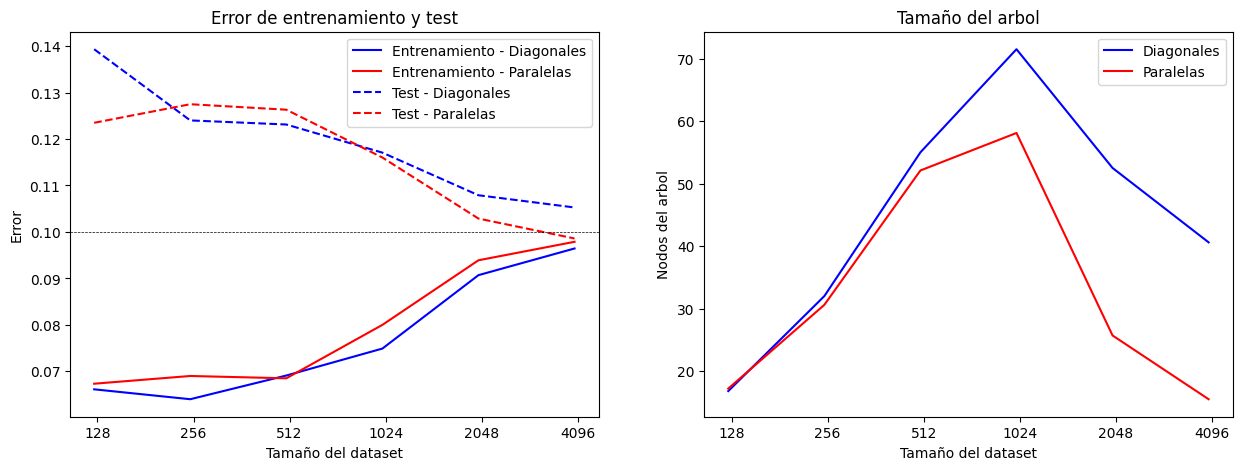

In [50]:
labels = list(df_diag.columns)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# ax[0] es la grafica del error y ax[1] es la grafica de los nodos

# Accedo a las columnas del dataframe
def getMean(df, col):
    return [np.mean(df[label][col]) for label in labels]

# Grafico de linea sizes vs train_error_mean, usar escala logaritmica en base 2 el eje x
# Muestro los numeros sin notacion cientifica
# Configurar el eje x para que no use notación científica
axs[0].set_xscale('log', base=2)
axs[0].plot(sizes, getMean(df_diag, "train_error"), label='Entrenamiento - Diagonales', color='blue')
axs[0].plot(sizes, getMean(df_par, "train_error"), label='Entrenamiento - Paralelas', color='red')
axs[0].plot(sizes, getMean(df_diag, "test_error"), label='Test - Diagonales', color='blue', ls='--')
axs[0].plot(sizes, getMean(df_par, "test_error"), label='Test - Paralelas', color='red', ls='--')
axs[0].set_title("Error de entrenamiento y test")
axs[0].set_xlabel("Tamaño del dataset")
axs[0].set_ylabel("Error")
axs[0].legend()
axs[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

# Grafico una linea horizontal en y = 0.10
axs[0].axhline(y=0.10, color='black', lw=0.5, ls='--')

axs[1].set_xscale('log', base=2)
axs[1].plot(sizes, getMean(df_diag, "node_sizes"), label='Diagonales', color='blue')
axs[1].plot(sizes, getMean(df_par, "node_sizes"), label='Paralelas', color='red')
axs[1].set_title("Tamaño del arbol")
axs[1].set_xlabel("Tamaño del dataset")
axs[1].set_ylabel("Nodos del arbol")
axs[1].legend()
axs[1].xaxis.set_major_formatter(mticker.ScalarFormatter())




# Grafico de linea sizes vs node_sizes_mean, usar escala logaritmica en base 2 el eje x
#axs[1].set_xscale('log', base=2)
#axs[1].plot(sizes, node_sizes_mean, label='node sizes', color='green')
#axs[1].set_title("Tamaño del arbol")
#axs[1].set_xlabel("Tamaño del dataset")
#axs[1].set_ylabel("Tamaño del arbol")
#axs[1].legend()

plt.plot()

Tanto el error de entrenamiento como el error de test parecen converger a 0.10. Este no es un valor cualquiera y surge de que tanto las diagonales como las paralelas se generan con distribuciones normales.

Los puntos $(X,Y)$ del plano se generan con una distribución normal bivariada.

Las diagonales se generan con matriz de covarianza:

$$\Sigma = 2 \cdot \begin{pmatrix}
    C^2 & 0 \\
    0 & C^2
\end{pmatrix}$$

Mientras que en las paralelas la matriz de covarianza es:

$$\Sigma = \begin{pmatrix}
    C^2 & 0 \\
    0 & C^2
\end{pmatrix}$$

En ambos casos la covarianza $\operatorname{cov}(X,Y)=0$, esto quiere decir que $X$ e $Y$
son variables aleatorias independientes y podemos ver a cada una como una distribución normal univariada.

Suponiendo que nos guiamos por el siguiente criterio para las paralelas:

$$\operatorname{Clase}(x,y) = \begin{cases}
    0 & \text{si } x\leq 0 \\
    1 & \text{si } x>0
\end{cases}$$

¿Cual es la probabilidad de equivocarnos?.

Los puntos de clase $0$ se generan con centro en $(-1,-1)$. Esto quiere decir que $X_0,Y_0 \sim \mathcal{N}(-1,C)$,
mientras que la clase 1 se genera con centro en $(1,1)$, por lo que $X_1,Y_1 \sim \mathcal{N}(1,C)$.

Este clasificador clasifica mal un punto de clase 0 cuando $X_0> 0$, la propiedad de este suceso puede calcularse
con una tabla de distribuciones normales.

$P(X_0> 0) = 0.0999$.

El clasificador clasifica mal un punto de clase 1 cuando $X_1 \leq 0$, con una tabla de distribuciones normales se puede
calcular que:

$P(X_1< 0) = 0.0999$

Entonces dados 5000 puntos de clase 0, y 5000 puntos de clase 1 la probabilidad de equivocarse es:

$\dfrac{P(X_0>0)*5000 + P(X_1<0)*5000}{10000} = 0.0999$

Lo cual se condice con lo observado en las gráficas.

Para el caso de las diagonales se puede seguir un procedimiento similar.


----

# Ejercicio 3

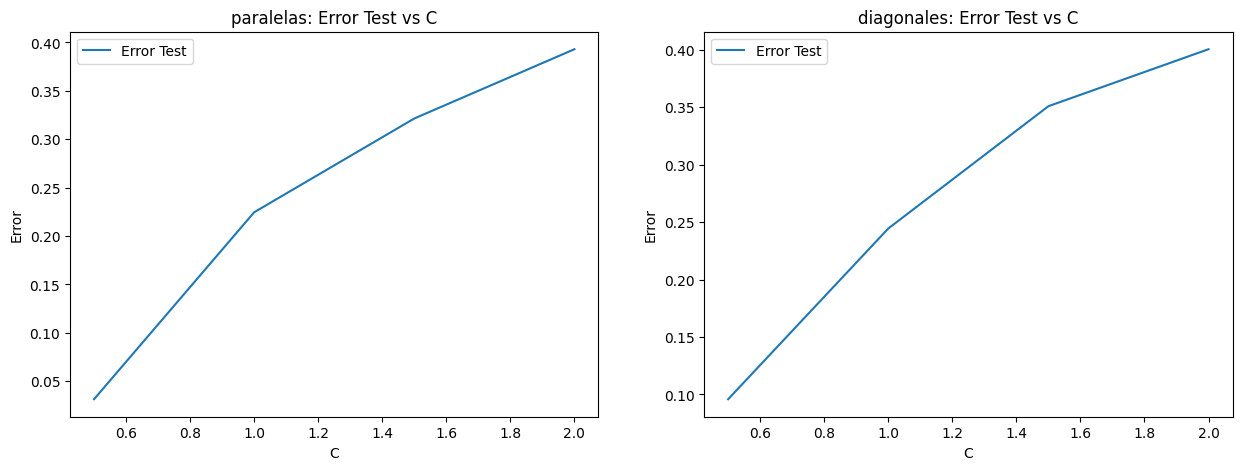

In [ ]:
d = 5
n = 250

Cs = [i/2 for i in range(1, 5, 1)]

def ruido():
    j = 0
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    for gen in [paralelas, diagonales]:
        test_error = []

        for c in Cs:
            test = gen(10000, d, c)

            X_test = test['input'].tolist()
            Y_test = test['output'].tolist()

            error = []
            TRAIN_SETS = 20

            for i in range(TRAIN_SETS):
                e = gen(n, d, c)
                X_train = e['input'].tolist()
                Y_train = e['output'].tolist()

                clf.fit(X_train, Y_train)

                scr = clf.score(X_test, Y_test)

                error.append(1-scr)

            test_error.append(np.mean(error))


        axs[j].plot(Cs, test_error, label='Error Test')
        axs[j].legend()
        axs[j].set_title(gen.__name__ + ': ' + 'Error Test vs C')
        axs[j].set_xlabel('C')
        axs[j].set_ylabel('Error')

        j += 1
    plt.show()

ruido()

???

# Ejercicio 4

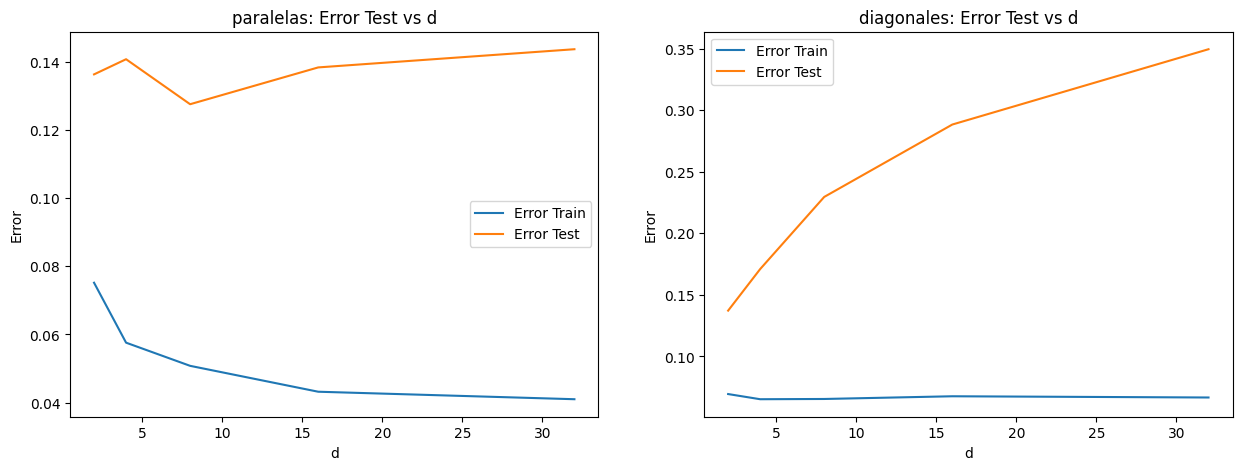

In [ ]:
C = 0.78
n = 250
ds = [2**i for i in range(1,6)]

def dimensionalidad():
    j = 0
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    for gen in [paralelas, diagonales]:
        error_train = []
        error_tests = []  

        for d in ds:
            TRAIN_SETS = 20
            errortr = []
            errorts = []

            test = gen(10000, d, C)

            X_test = test['input'].tolist()
            Y_test = test['output'].tolist()

            for i in range(TRAIN_SETS):
                e = gen(n, d, C)
                X_train = e['input'].tolist()
                Y_train = e['output'].tolist()

                clf.fit(X_train, Y_train)

                scr = clf.score(X_train, Y_train)

                errortr.append(1-scr)
                errorts.append(1-clf.score(X_test, Y_test))

            error_train.append(np.mean(errortr))
            error_tests.append(np.mean(errorts))

        axs[j].plot(ds, error_train, label='Error Train')
        axs[j].plot(ds, error_tests, label='Error Test')
        axs[j].legend()
        axs[j].set_title(gen.__name__ + ': ' + 'Error Test vs d')
        axs[j].set_xlabel('d')
        axs[j].set_ylabel('Error')

        j += 1
    plt.show()

dimensionalidad()


En base a los resultado obtenidos se pude observar que en el caso de las diagonales el error del test aumenta conforme aumenta el d, mientras que en las paralelas este aumento no es tan brusco. Ademas, que el error del train en las paralelas disminuye y en las diagonales se mantiene prácticamente igual.

Eso se puede deber a que a pesar de que ambas se calculan a partir de una distribución normal, los centros son distintos. (???)

# Ejercicio 5

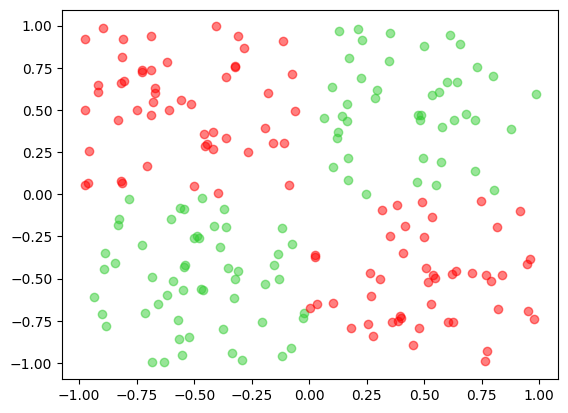

Train score:  0.5838926174496645
Test score:  0.48


[Text(0.4, 0.8333333333333334, 'x[0] <= -0.909\nentropy = 1.0\nsamples = 149\nvalue = [74.0, 75.0]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.81\nentropy = 0.999\nsamples = 143\nvalue = [74, 69]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.994\nsamples = 134\nvalue = [73, 61]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.503\nsamples = 9\nvalue = [1, 8]')]

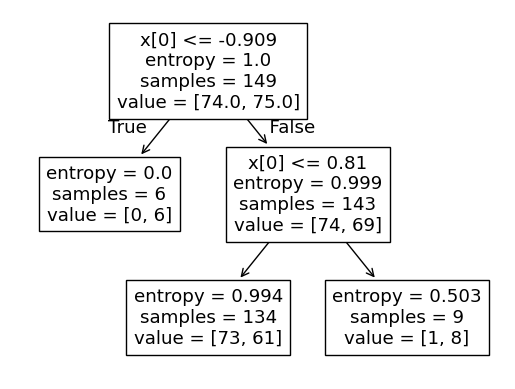

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# cargo el archivo xor.csv
# El archivo tiene dos columnas con floats y una columna con 0s y 1s
df = pd.read_csv('xor.csv')

# Accedo a la tercera columna
X = df.iloc[:, :2]
Y = df.iloc[:, 2].values

# Obtengo la primera columna como un array de numeros
A = X.iloc[:, 0].values
B = X.iloc[:, 1].values

puntos = list(zip(A, B, Y))

X1 = [x for x,_,c in puntos if c == 0]
X2 = [x for x,_,c in puntos if c == 1]
Y1 = [y for _,y,c in puntos if c == 0]
Y2 = [y for _,y,c in puntos if c == 1]

plt.scatter(X1, Y1, color='limegreen', alpha=0.5)
plt.scatter(X2, Y2, color='red', alpha=0.5)

plt.show()

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

coords = [[x,y] for x,y,_ in puntos]
clases = [c for _,_,c in puntos]

X_train, X_test, Y_train, Y_test = train_test_split(coords, clases, random_state=0)

clf.fit(X_train, Y_train)

tree.plot_tree(clf)


Al usar:
DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

Lo que se obtiene un árbol donde
Train score:  0.5838926174496645
Test score:  0.48

Este bajo score de puede deber a que al momento de crear el árbol se esta usando una "impureza minimal" del 0.03 haciendo que se restringan las cantidad de divisiones que puede realizarse por nodo. 

Lo que haría que haya overfittng